In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN, KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Exploratory Analysis of New York Crime Data
---

Given the difficulty had in properly modelling this data, and with the ongoing goal of analyzing what can be learned by crime data in the city of New York, this notebook will conduct an unsupervised model of the data, in the hopes of identifying important trends for follow up studies to be built around.

### Method of Analysis
---
- Using unsupervised modelling, cluster the data into relevant groups

- If sufficient silhouette score are achieved, pass these labels into the original dataframe and conduct EDA

- Report findings of any trends

**NOTE: As this is purely exploratory analysis, there can be no definitive conclusions drawn from these findings. At best, these results will serve as a guide to imortant next steps in achieving better results in follow up data collection.**

## Reading in Data
---

In [2]:
df = pd.read_csv('complaints_2018_final.csv')

In [3]:
df.cmplnt_fr_dt = df.cmplnt_fr_dt.apply(lambda x: pd.to_datetime(x))

In [4]:
df['dayofweek'] = df.cmplnt_fr_dt.apply(lambda x: x.day_name())
df['month'] = df.cmplnt_fr_dt.apply(lambda x: x.month)

In [5]:
df.head()

,cmplnt_num,cmplnt_fr_dt,cmplnt_fr_tm,rpt_dt,ky_cd,ofns_desc,pd_cd,pd_desc,law_cat_cd,boro_nm,...,county,zipcodes,adjusted_gross_income_(agi),avg_agi,total_income_amount,avg_total_income,taxable_income_amount,avg_taxable_income,dayofweek,month
0,453608592,2018-12-21,10:00 AM,2019-01-02,341,petit_larceny,338,larceny_petit_from_building_un,misdemeanor,manhattan,...,New York,10002.0,2002349.0,46.126446,2033619.0,46.846786,1347603.0,52.867909,Friday,12
1,878647334,2018-10-17,14:30 PM,2019-01-15,341,petit_larceny,349,larceny_petit_of_license_plate,misdemeanor,queens,...,Queens,11385.0,1929001.0,40.653340,1948325.0,41.060590,1141610.0,34.149267,Wednesday,10
2,128026914,2018-12-24,20:00 PM,2019-01-02,341,petit_larceny,349,larceny_petit_of_license_plate,misdemeanor,bronx,...,Bronx,10464.0,163217.0,76.269626,165381.0,77.280841,116220.0,66.034091,Monday,12
3,997752766,2018-09-17,07:00 AM,2019-01-07,112,theft_fraud,739,fraud_unclassified_felony,felony,brooklyn,...,Kings,11204.0,1606891.0,50.499403,1629709.0,51.216499,902117.0,47.680603,Monday,9
4,746011851,2018-09-04,10:00 AM,2019-12-09,116,sex_crimes,168,sodomy_1,felony,bronx,...,Bronx,10467.0,1357285.0,31.616236,1368864.0,31.885954,710802.0,25.819179,Tuesday,9


In [13]:
df.columns

Index(['cmplnt_num', 'cmplnt_fr_dt', 'cmplnt_fr_tm', 'rpt_dt', 'ky_cd',
       'ofns_desc', 'pd_cd', 'pd_desc', 'law_cat_cd', 'boro_nm',
       'prem_typ_desc', 'susp_age_group', 'susp_race', 'susp_sex', 'latitude',
       'longitude', 'patrol_boro', 'vic_age_group', 'vic_race', 'vic_sex',
       'population', 'area', 'county', 'zipcodes',
       'adjusted_gross_income_(agi)', 'avg_agi', 'total_income_amount',
       'avg_total_income', 'taxable_income_amount', 'avg_taxable_income'],
      dtype='object')

## Unsupervised Models
---

In [5]:
#What I plan to dummy later, since they are object type data
morons = ['ofns_desc','pd_desc', 'law_cat_cd', 'boro_nm',
       'prem_typ_desc', 'susp_age_group', 'susp_race', 'susp_sex','patrol_boro', 'vic_age_group', 'vic_race', 'vic_sex',
       'population', 'area', 'county', 'zipcodes','dayofweek']

In [ ]:
#This is commented out because of the massive amount of time involved in analyzing the complete dataset

X = df.drop(columns = ['cmplnt_num','cmplnt_fr_dt', 'cmplnt_fr_tm', 'rpt_dt'])
X = pd.get_dummies(X, columns = morons, drop_first = True)

In [8]:
sc = StandardScaler()
#Z = sc.fit_transform(X)

In [9]:
#Adjustable code that will allow for different low/high values to test for best clusters in a KMeans
def elbow(Z, low = 2, high = 8):
    things = []
    for clusters in range(low, high):
        kmeans = KMeans(n_clusters=clusters,
                        random_state=42)
        kmeans.fit(Z)
        things.append(kmeans.inertia_)

    plt.plot(list(range(low, high)), things, marker='o')
    plt.title('The Elbow Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Sum of Squared Distance from Centroid')

In [30]:
%%time
km = KMeans(n_clusters = 3)
km.fit(Z)

CPU times: user 43min 50s, sys: 2h 1min 55s, total: 2h 45min 46s
Wall time: 5h 20min 27s


KMeans(n_clusters=3)

This data is simply too large to analyze under time contraints. I will have to settle for sampling a small subset of the data.

## Subset Analysis
---

In [10]:
sample = df.sample(frac = .35)

In [14]:
X = sample.drop(columns = ['cmplnt_num','cmplnt_fr_dt', 'cmplnt_fr_tm', 'rpt_dt'])
X = pd.get_dummies(X, columns = morons, drop_first = True)

Z = sc.fit_transform(X)

In [ ]:
%%time
elbow(Z)

In [ ]:
%%time
elbow(Z, low = 8, high = 12)

It looks like there's not one good option to use here. I'll try 4 and 5.

In [ ]:
%%time
km = KMeans(n_clusters = 4)
km.fit(Z)

In [53]:
silhouette_score(Z, km.labels_)

0.0055640868596016696

In [54]:
km = KMeans(n_clusters = 5)
km.fit(Z)

KMeans(n_clusters=5)

In [56]:
silhouette_score(Z, km.labels_)

0.005407955459575741

It is beginning to appear that this analyis will simply be confirmation that this data has very little correlations to be found within it, which would explain the relatively poor performance of modelling in other notebooks.

## DBSCAN attempt
---

In [14]:
%%time
db = DBSCAN(eps = .2, min_samples = 5, n_jobs = -1)

db.fit(Z)

CPU times: user 10h 59min 8s, sys: 36.4 s, total: 10h 59min 44s
Wall time: 1h 27min 8s


DBSCAN(eps=0.2, n_jobs=-1)

In [16]:
labels = db.labels_
set(labels)

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13}

In [17]:
silhouette_score(Z, labels)

-0.2403206722800253

The clustering and DBscan scores are very bad on just the 

## Simplify the features with a PCA
---

In [12]:
Z.shape

(321110, 1094)

In [15]:
pca = PCA(n_components = 10)

In [16]:
%%time
simple = pca.fit_transform(Z)

CPU times: user 48.6 s, sys: 12 s, total: 1min
Wall time: 26 s


In [15]:
simple.shape

(321110, 10)

In [16]:
simple[:1]

array([[-0.11941112,  2.97888485, -2.21543474, -2.39071765, -0.86396106,
        -0.52519246, -0.80158284,  0.00495879, -0.18521671, -0.26184562]])

## Passing the PCA data into a K-Means Cluster
---

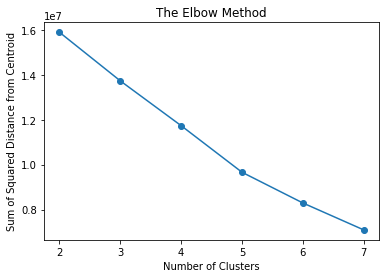

In [17]:
elbow(simple)

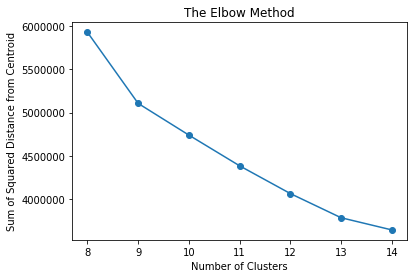

In [18]:
elbow(simple, low = 8, high = 15)

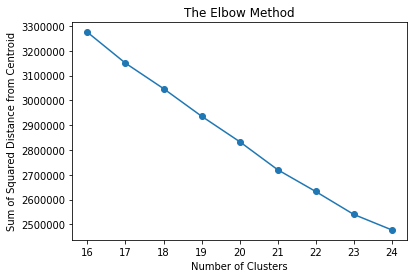

In [19]:
elbow(simple, low = 16, high = 25)

Looks like k = 12 and k = 13 may be helpful.

In [17]:
km1 = KMeans(n_clusters = 9)
km1.fit(simple)

KMeans(n_clusters=9)

In [25]:
silhouette_score(simple, km1.labels_)

0.43630075153466497

In [29]:
#This should be expected, actually - there's no reason to expand the silhouette score into a model it was not fit to.
silhouette_score(Z, km.labels_)

-0.04765971285650341

In [26]:
km2 = KMeans(n_clusters = 13)
km2.fit(simple)

KMeans(n_clusters=13)

In [27]:
silhouette_score(simple, km2.labels_)

0.3584394073178004

In [18]:
labels = km1.labels_
labels.shape

(321110,)

In [31]:
labels[:20]

array([0, 5, 0, 0, 2, 1, 3, 1, 0, 0, 0, 7, 5, 4, 1, 5, 6, 0, 0, 5],
      dtype=int32)

These are much better results. It may be that some meaningful EDA can be carried out here!

## EDA on clusters - what (if anything) do they mean?
---

In [19]:
sample['cluster_num'] = labels

In [20]:
sample.head()

,cmplnt_num,cmplnt_fr_dt,cmplnt_fr_tm,rpt_dt,ky_cd,ofns_desc,pd_cd,pd_desc,law_cat_cd,boro_nm,...,zipcodes,adjusted_gross_income_(agi),avg_agi,total_income_amount,avg_total_income,taxable_income_amount,avg_taxable_income,dayofweek,month,cluster_num
848334,102950977,2019-11-02,21:40 PM,2019-11-04,578,harrassment_2,638,harassment_subd_3_4_5,violation,brooklyn,...,11207.0,1206549.0,29.292280,1216052.0,29.522991,589617.0,23.195004,Saturday,11,1
341756,448806172,2018-05-06,20:40 PM,2018-05-06,118,dangerous_weapons,793,weapons_possession_3,felony,brooklyn,...,11233.0,1017712.0,34.312610,1027186.0,34.632030,559758.0,28.058045,Sunday,5,1
166290,100935331,2018-06-09,15:50 PM,2018-06-09,106,felony_assault,109,assault_2_1_unclassified,felony,bronx,...,10466.0,1122503.0,35.477339,1129756.0,35.706574,594528.0,27.159799,Saturday,6,2
282348,145556976,2018-10-30,01:00 AM,2018-10-30,107,burglary,223,burglary_residence_night,felony,queens,...,11694.0,748839.0,90.330398,756415.0,91.244270,445402.0,67.485152,Tuesday,10,6
388707,222984570,2018-09-14,16:45 PM,2018-09-14,578,harrassment_2,638,harassment_subd_3_4_5,violation,brooklyn,...,11221.0,1166455.0,31.966429,1178856.0,32.306276,640326.0,26.157108,Friday,9,1


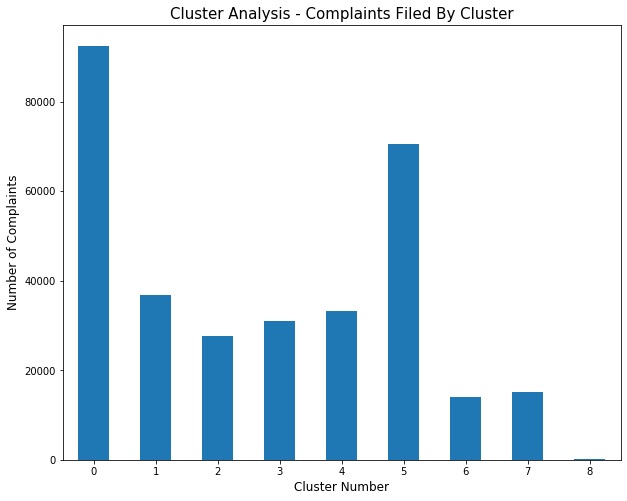

In [34]:
sample.groupby('cluster_num').cmplnt_num.count().plot.bar(rot = 0, figsize = (10, 8))
plt.title("Cluster Analysis - Complaints Filed By Cluster", fontsize = 15)
plt.xlabel('Cluster Number', fontsize = 12)
plt.ylabel('Number of Complaints', fontsize = 12);

Right away, it appears that almost no data was placed into cluster 8, while clusters 0 and 5 are the largest of the 9 clusters.

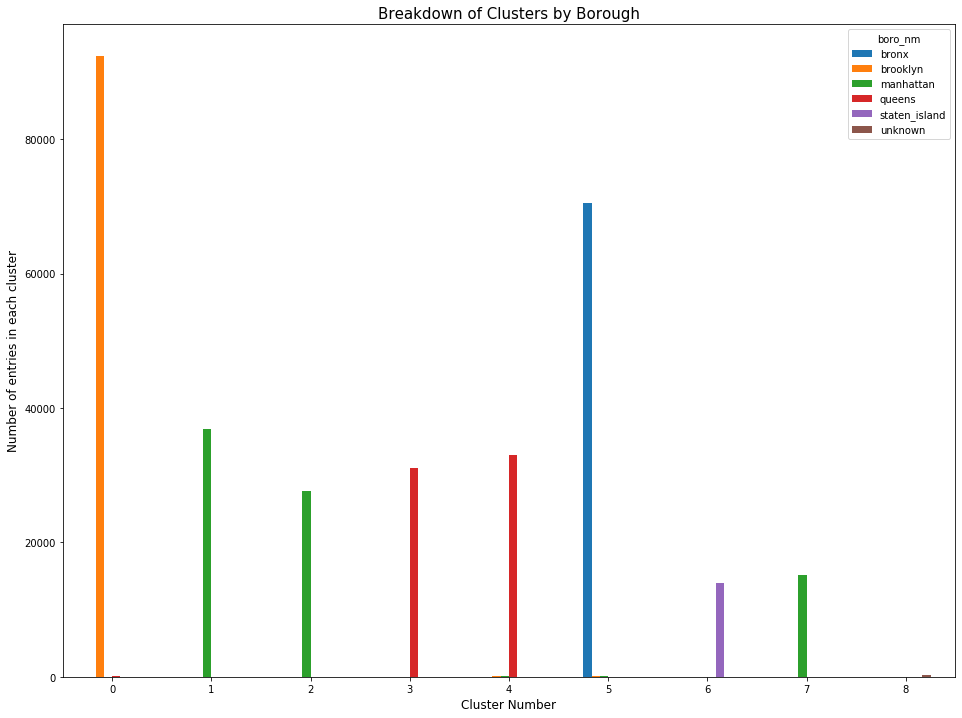

In [35]:
sample.groupby('cluster_num').boro_nm.value_counts().unstack().plot.bar(rot = 0, figsize = (16, 12))
plt.title('Breakdown of Clusters by Borough', fontsize = 15)
plt.xlabel('Cluster Number', fontsize = 12)
plt.ylabel('Number of entries in each cluster', fontsize = 12);

Interestingly, the predominant boroough in each cluster forms an identical distribution to the total number of complaints, indicating that very likely each cluster contains almost 100% of one borough, with almost 0% of any others.

In [36]:
sample.groupby('cluster_num').boro_nm.value_counts(normalize = True).unstack()

boro_nm,bronx,brooklyn,manhattan,queens,staten_island,unknown
cluster_num,,,,,,
0,0.000097,0.999232,0.000011,0.000627,0.000011,0.000022
1,NaN,0.000081,0.999864,0.000027,NaN,0.000027
2,NaN,0.000036,0.999928,0.000036,NaN,NaN
3,NaN,0.000709,0.000032,0.999195,0.000064,NaN
4,NaN,0.001870,0.001659,0.996411,0.000060,NaN
5,0.997961,0.000651,0.001374,NaN,0.000014,NaN
6,NaN,NaN,NaN,0.000072,0.999928,NaN
7,NaN,NaN,0.999934,NaN,NaN,0.000066
8,NaN,NaN,NaN,NaN,NaN,1.000000


**UPDATE THIS**

For the most part, clusters 1 and 11 pretty much exclusively deal witht the bronx, 5, 8, and 12 with brooklyn, 0, 6, 9 and 10 with manhattan, 2 and 4 with queens, 3 with staten_island, and 7 with the "Null" borough value.

For the most part, each cluster contains nearly 100% entries from a single borough (over 99%). This is very likely a major contributer to signal.

Note below: The "unknown" race value was fairly  evenly distributed through the clusters.

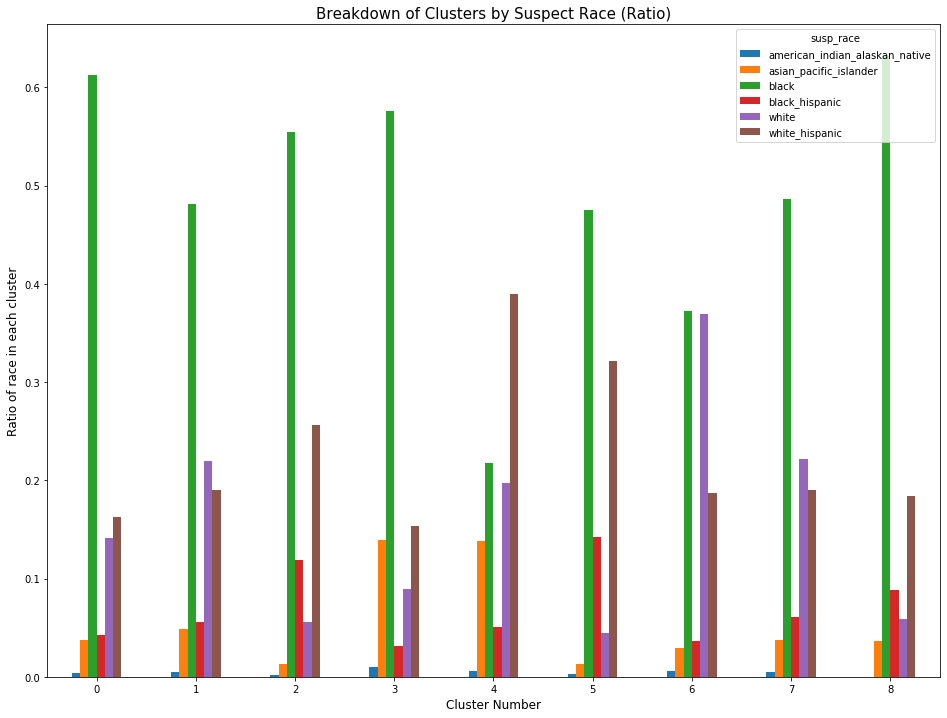

In [39]:
known_race = sample[sample.susp_race != 'unknown']
known_race.groupby('cluster_num').susp_race.value_counts(normalize = True).unstack().plot.bar(rot = 0, figsize = (16, 12))
plt.title('Breakdown of Clusters by Suspect Race (Ratio)', fontsize = 15)
plt.xlabel('Cluster Number', fontsize = 12)
plt.ylabel('Ratio of race in each cluster', fontsize = 12);

There are simiar distributions for all 9 clusters, with a few spikes for one class (for example, white hispanic at cluster 4 and 5). Given the strong correlation to borough earlier, I suspect this has more to do with location.

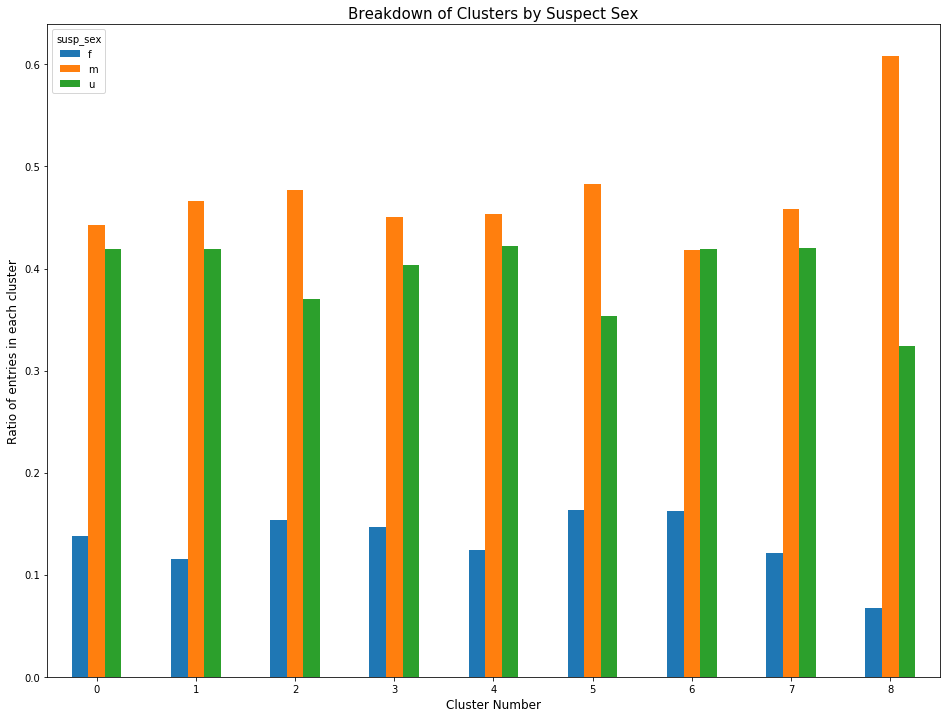

In [40]:
sample.groupby('cluster_num').susp_sex.value_counts(normalize = True).unstack().plot.bar(rot = 0, figsize = (16, 12))
plt.title('Breakdown of Clusters by Suspect Sex', fontsize = 15)
plt.xlabel('Cluster Number', fontsize = 12)
plt.ylabel('Ratio of entries in each cluster', fontsize = 12);

There are no clusters where female suspects outweigh the other two classes, and the distributions are not very different (with the exception of the last cluster). The suspect's sex is likely not a source of correlation in the data (perhaps because the classes are imbalanced to favor males).

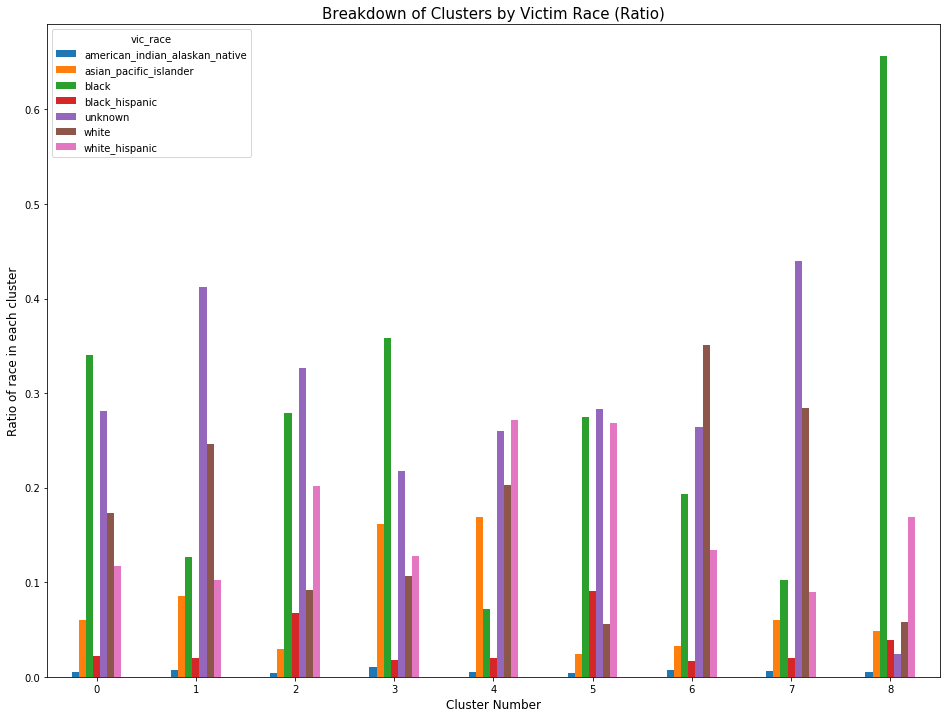

In [41]:
sample.groupby('cluster_num').vic_race.value_counts(normalize = True).unstack().plot.bar(rot = 0, figsize = (16, 12))
plt.title('Breakdown of Clusters by Victim Race (Ratio)', fontsize = 15)
plt.xlabel('Cluster Number', fontsize = 12)
plt.ylabel('Ratio of race in each cluster', fontsize = 12);

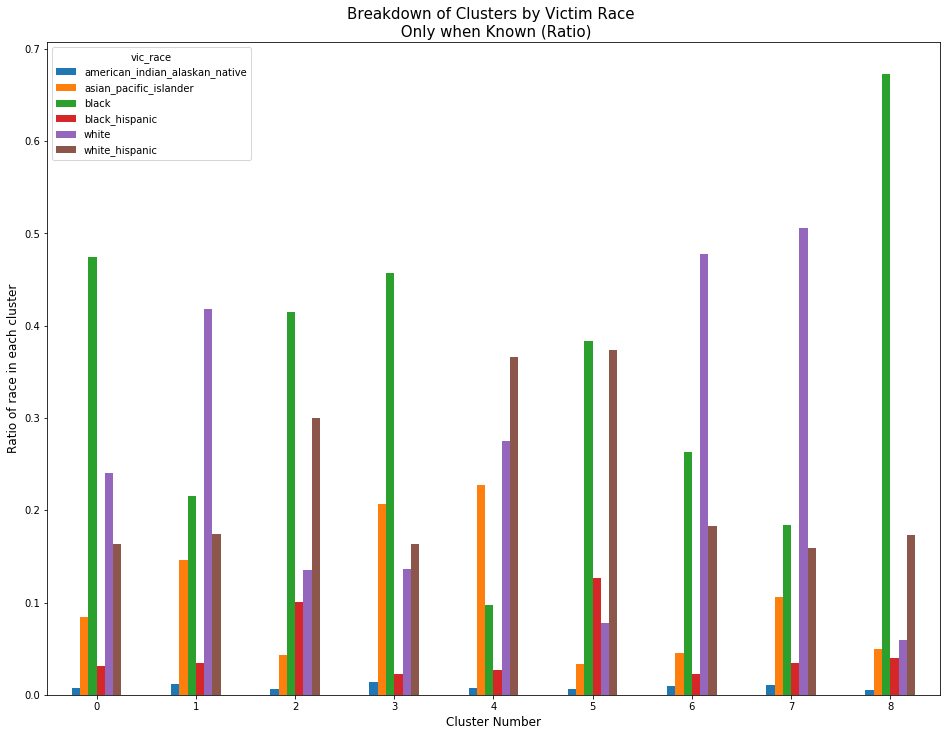

In [42]:
known_race = sample[sample.vic_race != 'unknown']
known_race.groupby('cluster_num').vic_race.value_counts(normalize = True).unstack().plot.bar(rot = 0, figsize = (16, 12))
plt.title('Breakdown of Clusters by Victim Race \n Only when Known (Ratio)', fontsize = 15)
plt.xlabel('Cluster Number', fontsize = 12)
plt.ylabel('Ratio of race in each cluster', fontsize = 12);

The breakdown of victim race is fairly sharply different in each cluster - there could be a significant pattern that the model picked up on when it comes to classifying victims by race in New York.

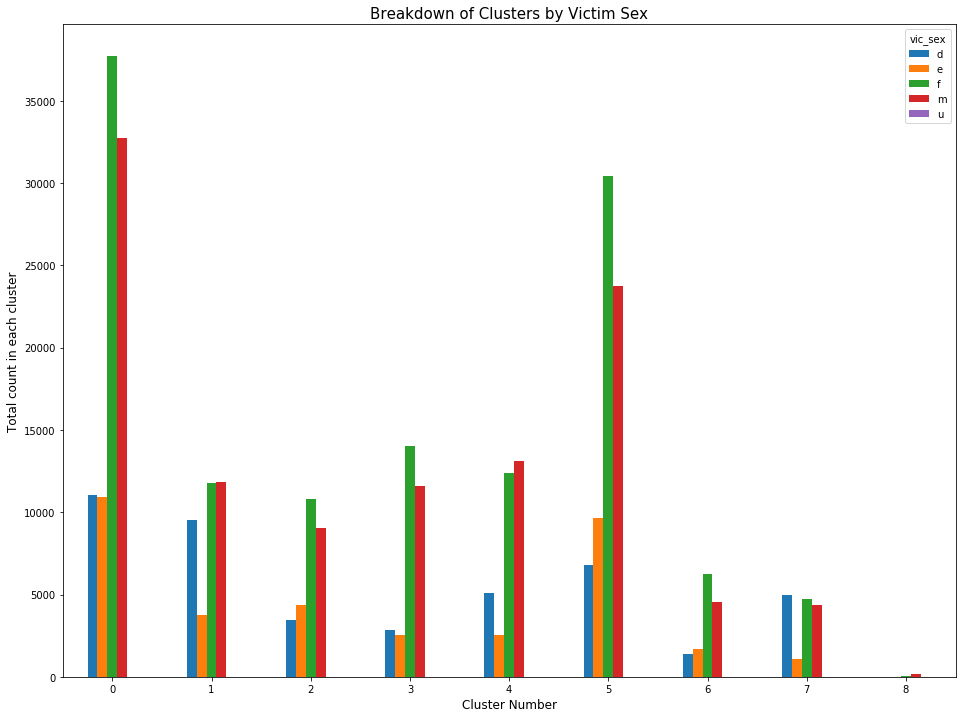

In [43]:
sample.groupby('cluster_num').vic_sex.value_counts().unstack().plot.bar(rot = 0, figsize = (16, 12))
plt.title('Breakdown of Clusters by Victim Sex', fontsize = 15)
plt.xlabel('Cluster Number', fontsize = 12)
plt.ylabel('Total count in each cluster', fontsize = 12);

There are some interesting trends here - sadly, the large number of classes associated with victim sex (some of which are not interpretable) seriously diminish the ability to interpret this chart.

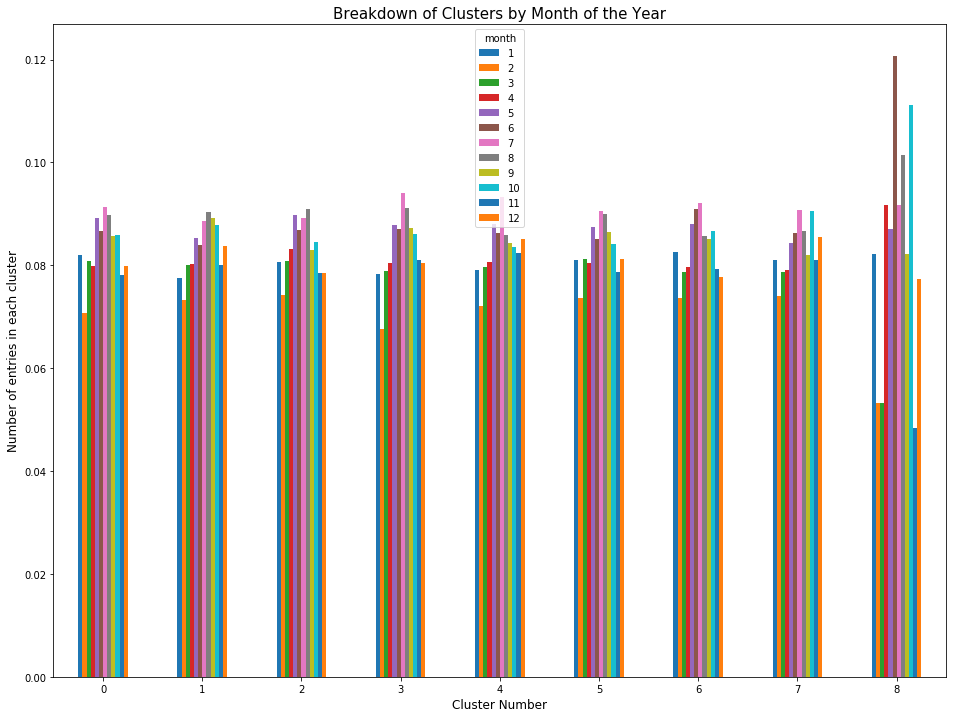

In [46]:
sample.groupby('cluster_num').month.value_counts(normalize = True).unstack().plot.bar(rot = 0, figsize = (16, 12))
plt.title('Breakdown of Clusters by Month of the Year', fontsize = 15)
plt.xlabel('Cluster Number', fontsize = 12)
plt.ylabel('Number of entries in each cluster', fontsize = 12);

With the exception of cluster 8 (which is by far the smallest cluster), this appears to be almost uniformly distributed, so month of the year was likely not a significant source of signal. Cluster 8 most likely just doesn't have enough data to accurately portray the correct distribution of complaints.

In [105]:
sample.columns

Index(['cmplnt_num', 'cmplnt_fr_dt', 'cmplnt_fr_tm', 'rpt_dt', 'ky_cd',
       'ofns_desc', 'pd_cd', 'pd_desc', 'law_cat_cd', 'boro_nm',
       'prem_typ_desc', 'susp_age_group', 'susp_race', 'susp_sex', 'latitude',
       'longitude', 'patrol_boro', 'vic_age_group', 'vic_race', 'vic_sex',
       'population', 'area', 'county', 'zipcodes',
       'adjusted_gross_income_(agi)', 'avg_agi', 'total_income_amount',
       'avg_total_income', 'taxable_income_amount', 'avg_taxable_income',
       'dayofweek', 'month', 'cluster_num'],
      dtype='object')

In [47]:
sample[['latitude', 'longitude']].head()

,latitude,longitude
852166,40.683363,-73.974867
895600,40.816983,-73.815135
881168,40.655499,-73.917952
518991,40.661913,-73.897175
136807,40.787875,-73.928182


In [48]:
sample.total_income_amount.nunique()

182

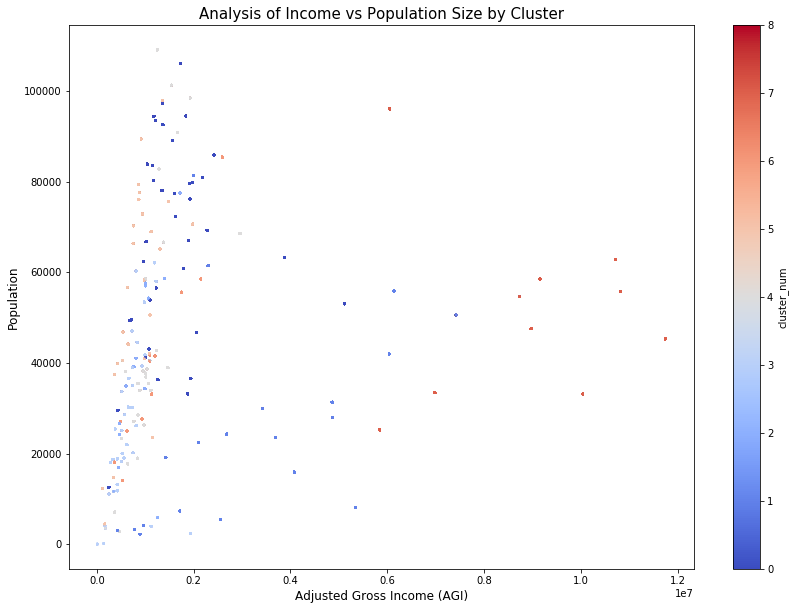

In [49]:
sample.plot.scatter('adjusted_gross_income_(agi)', 'population', s = 2,
                    c = 'cluster_num', cmap = 'coolwarm', figsize = (14, 10), sharex = False)
plt.title('Analysis of Income vs Population Size by Cluster', fontsize = 15)
plt.xlabel('Adjusted Gross Income (AGI)', fontsize = 12)
plt.ylabel('Population', fontsize = 12);

In [24]:
sample['negative_lat'] = sample.latitude.apply(lambda x: -1 * x)

No strong separation here.

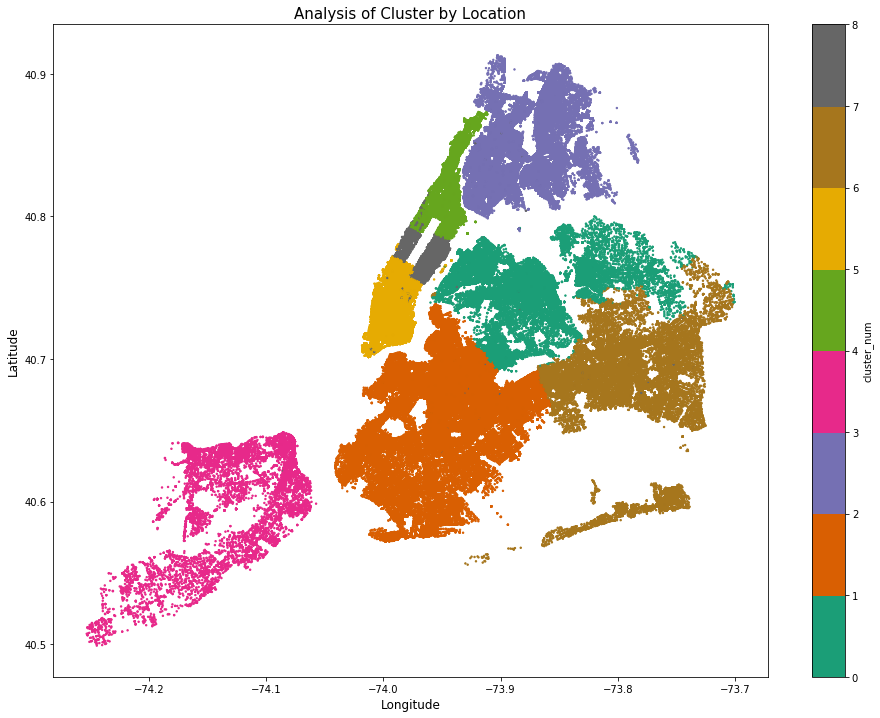

In [28]:
#Dark2 is a great cmap choice, as it makes it very clear where each cluster is located
sample.plot.scatter('longitude','latitude', s = 2,
                    c = 'cluster_num', cmap = 'Dark2', figsize = (16, 12), sharex = False)
plt.title('Analysis of Cluster by Location', fontsize = 15)
plt.xlabel('Longitude', fontsize = 12)
plt.ylabel('Latitude', fontsize = 12);

This appears to be the highest separator of the clusters, as there is very clear separation of each cluster and almost no overlap. 

This is a strong indicator that these locations have unique features that separate them from one another. 

It is also of interest that the map is not necessarily a breakdown of the different boroughs - for example, Queens is actually divided up into multiple clusters. This would be an important source of investigation in a follow up study.

## Conclusions
---
- Looking at the similarity of boroughs with the total count of complaints in New York, there appears to be unique features that separate the clusters that my model created.

- Stronger than this is the Latitude and Longitude coordinates, which clearly show the separation of each cluster. Given that many of these clusters are touching, I do think it likely that some other features separate these clusters clearly along location lines. 

- Despite the relatively poor performance of the classification model in the Neighborhood Analysis Notebook, this result is a clear indication that location is an imortant feature to identify differences in the impact of crime in New York - specifically, according to the map created above.

*Important Caveat to these findings - due to processing and time limitations, this study had to be done on a small sampling of the entire data. This analysis would ideally be done on the entirety of the dataset, to hopefully find even stronger correlations.*

## Next Steps
---
- Sadly, the income information that was drawn for this project was merely an estimation that was too general to yield helpful results. However, it is still highly suspect to be a strong predictor of the number of and type of crimes committed. Perhpas following more recent Census and IRS data to the specific regions given above, we can analyze these differences to evaluate their effects on crime.

- This data is clearly showing differences based on these geographic locations. I would recommend a thorough survey of each of these 8 regions displayed (as cluster 8, the 9th cluster, is practically not visible on the plot). An analysis of their specific traits for comparison would be helpful here. In addition, a study of each region's specific history, local laws/leaders, current events, and even a consultation with individuals knowledgeable about the areas of each cluster would lead to more advanced insight, and should likely be the primary direction of a followup study.